In [1]:
!pip install ucimlrepo
!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from xgboost import XGBClassifier
from scipy.stats import randint, uniform

In [3]:
# fetch dataset 
covertype = fetch_ucirepo(id=31)

# data (as pandas dataframes)
X = covertype.data.features
y = covertype.data.targets

In [4]:
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


# **BoxPlot of the First 10 Features**

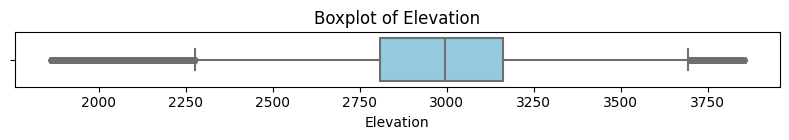

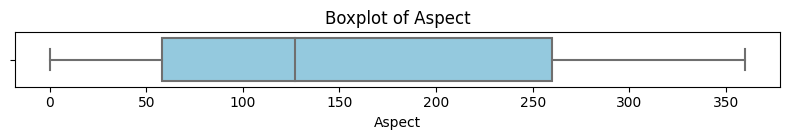

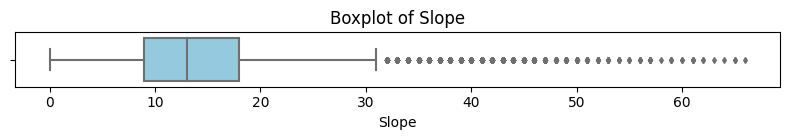

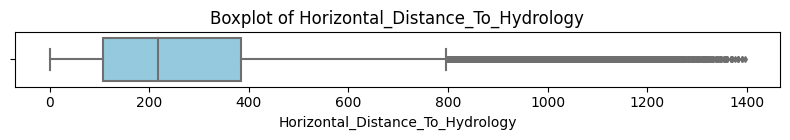

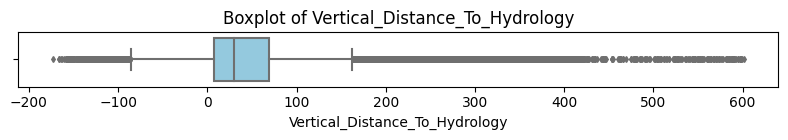

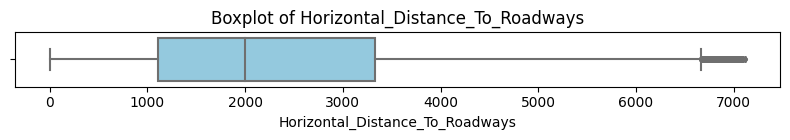

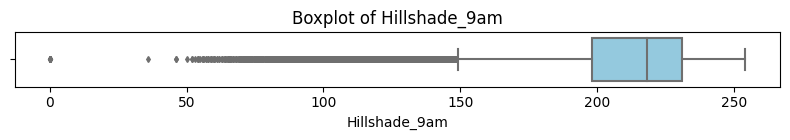

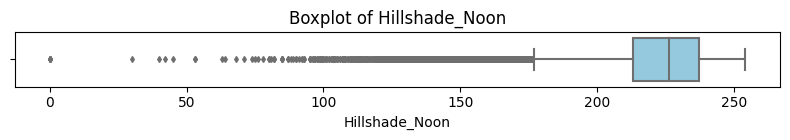

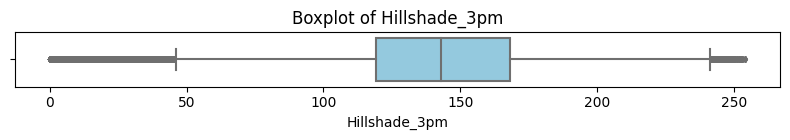

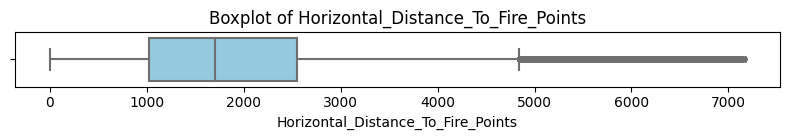

In [5]:
X_numeric = X.select_dtypes(include=['int64', 'float64']).iloc[:, :10]

# Create individual boxplots
for feature in X_numeric:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=X[feature], color='skyblue', fliersize=3)
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

# **Histograms of the First 10 Features**

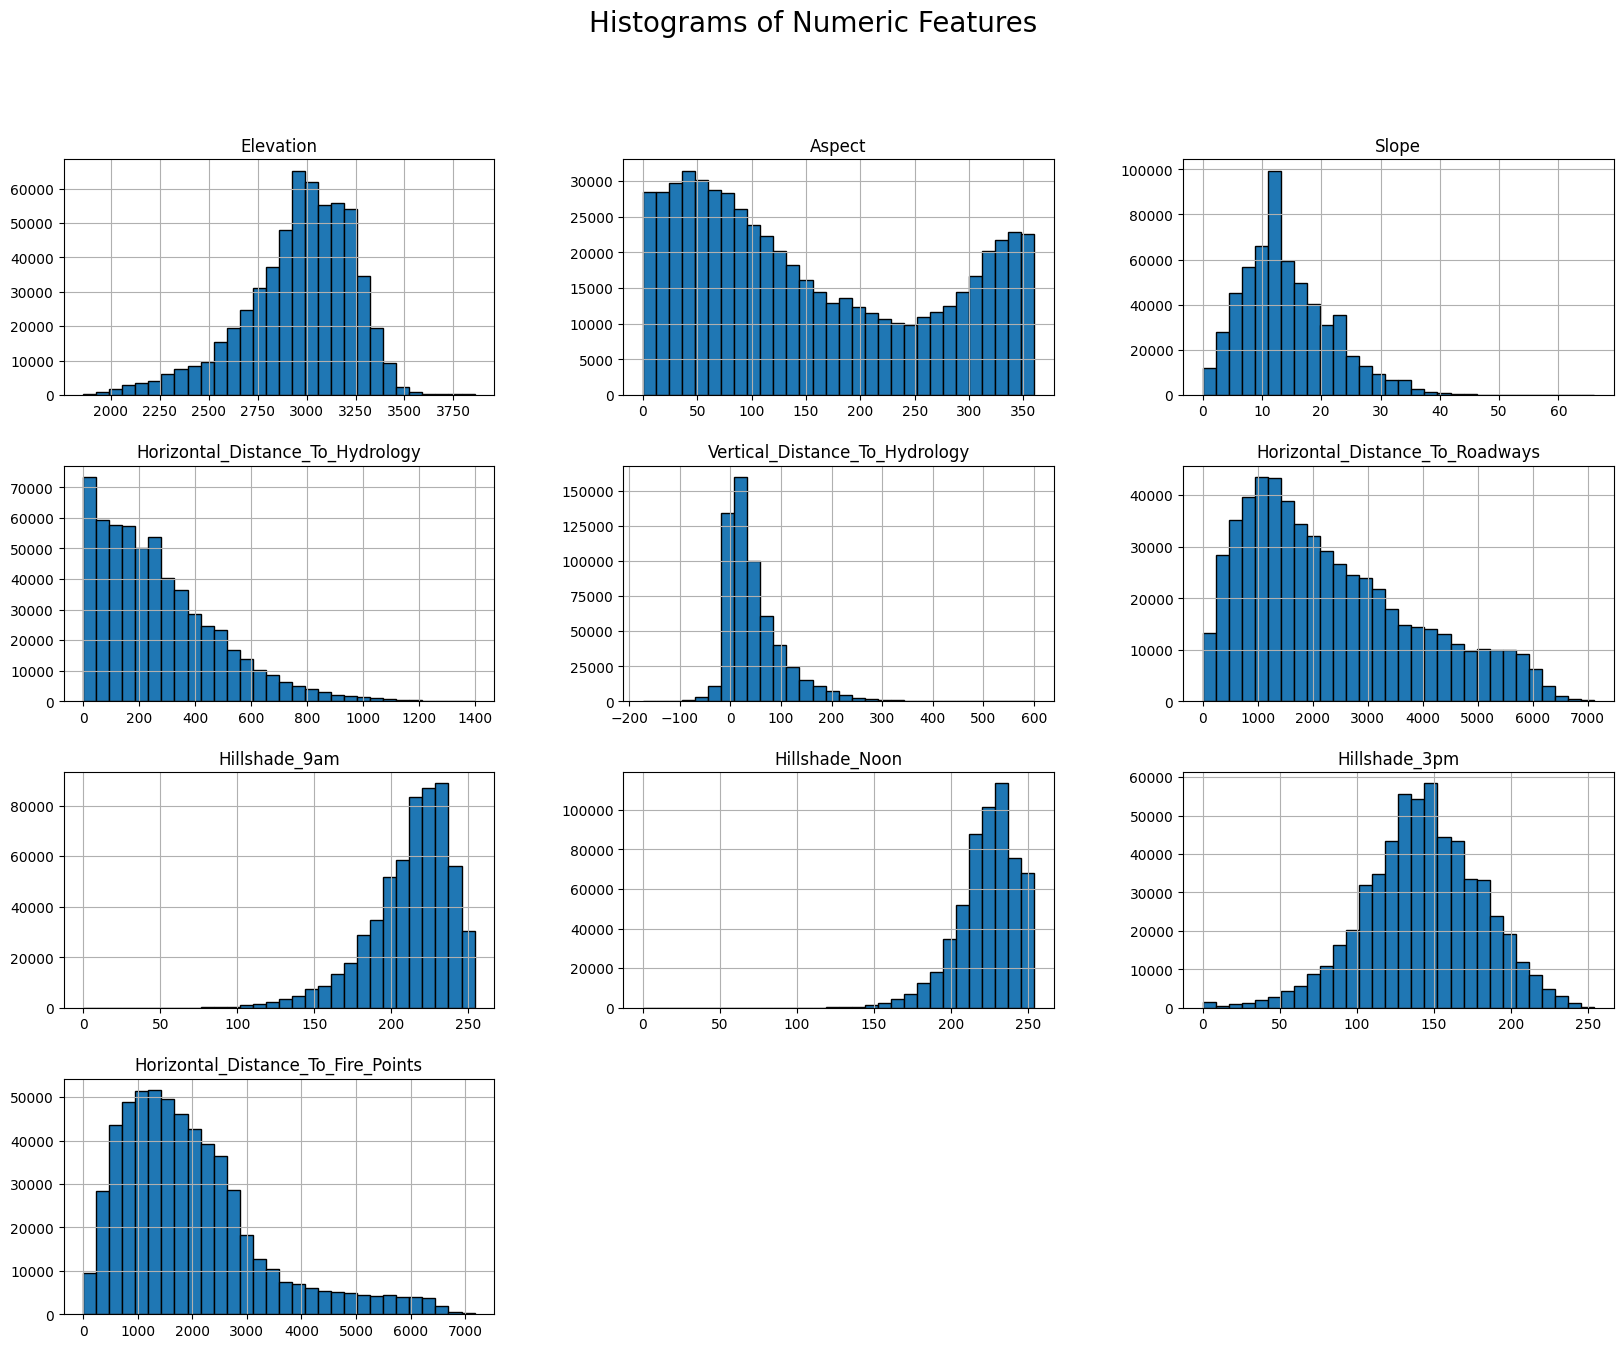

In [6]:
X_numeric.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=20)
plt.show()

# **Normalization And Scaling of Data Comparison**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


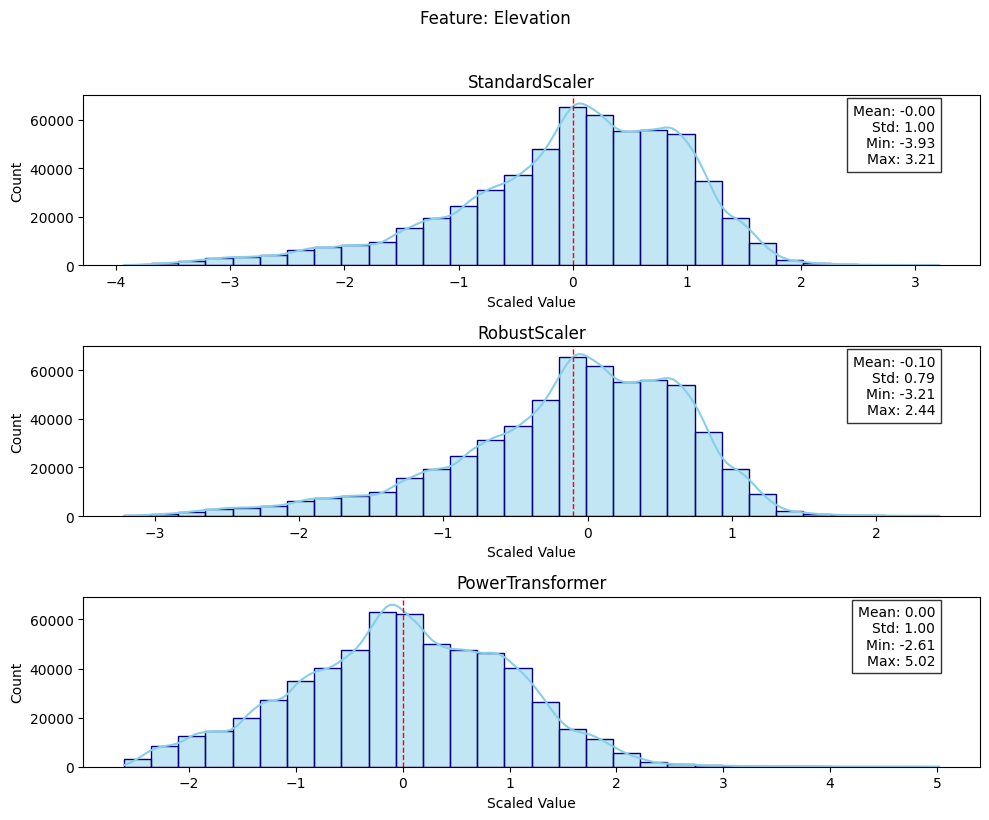

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


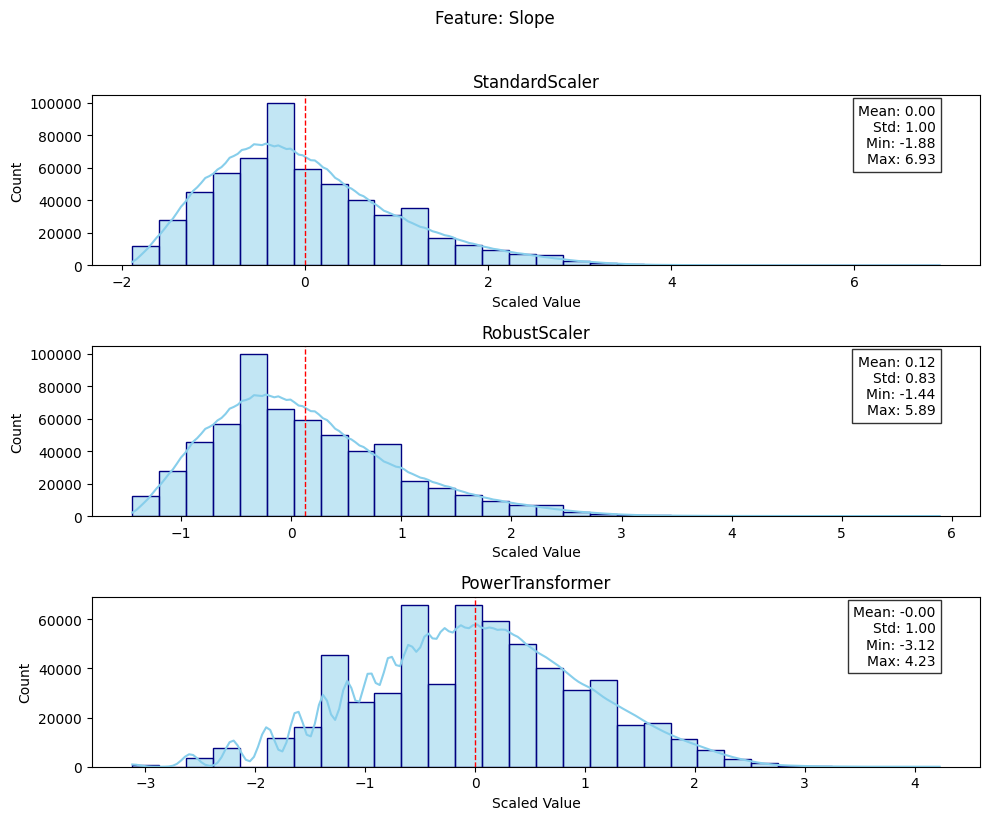

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


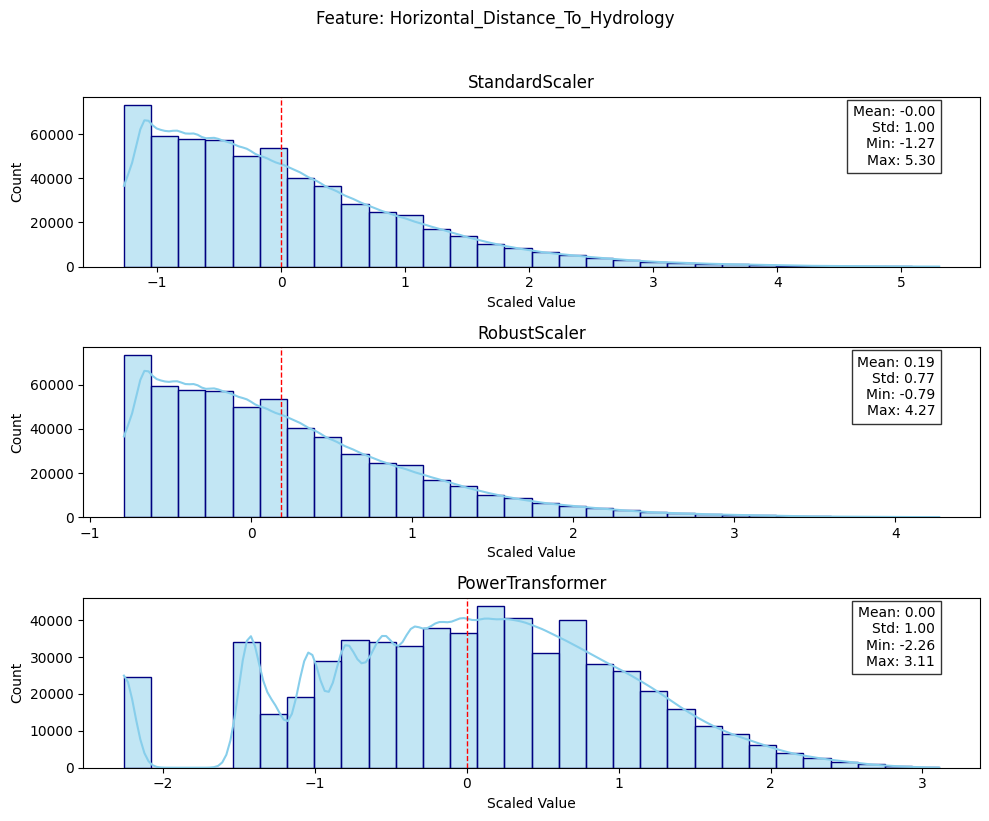

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


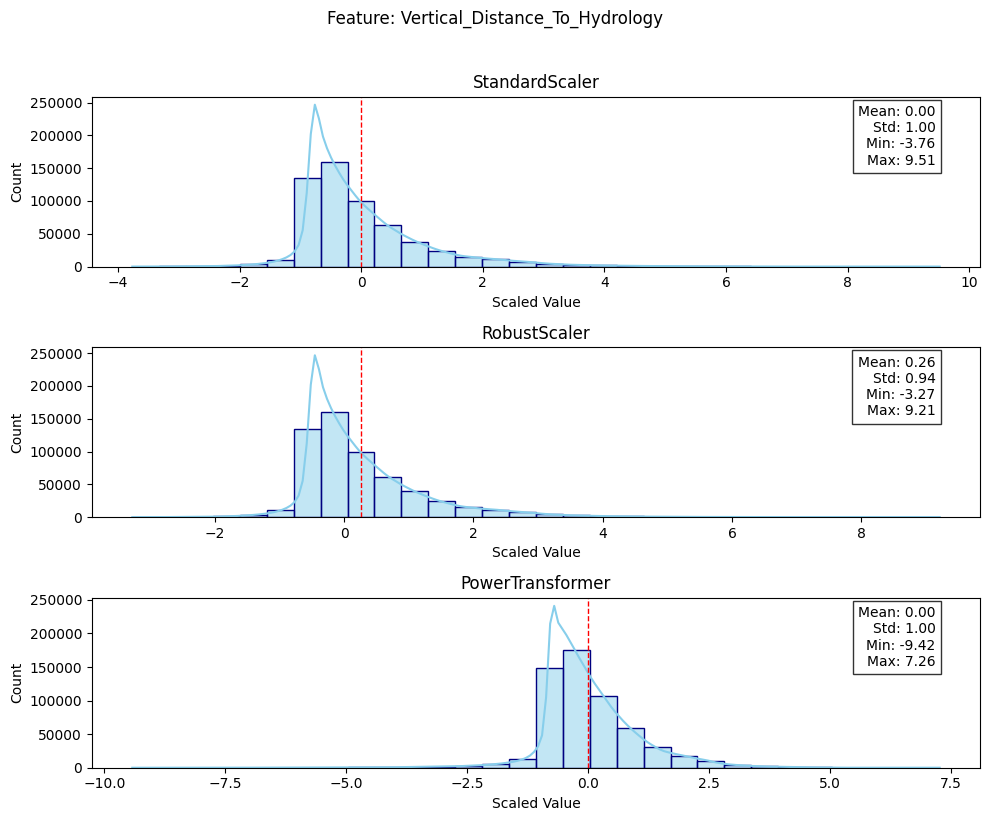

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


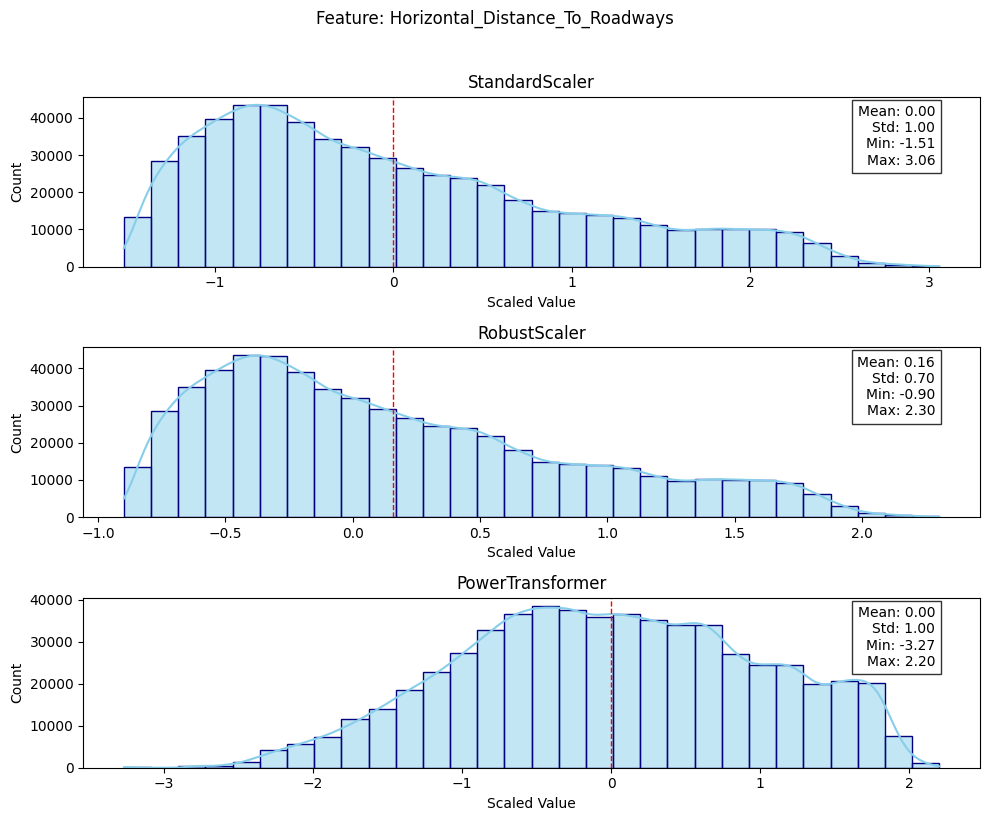

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


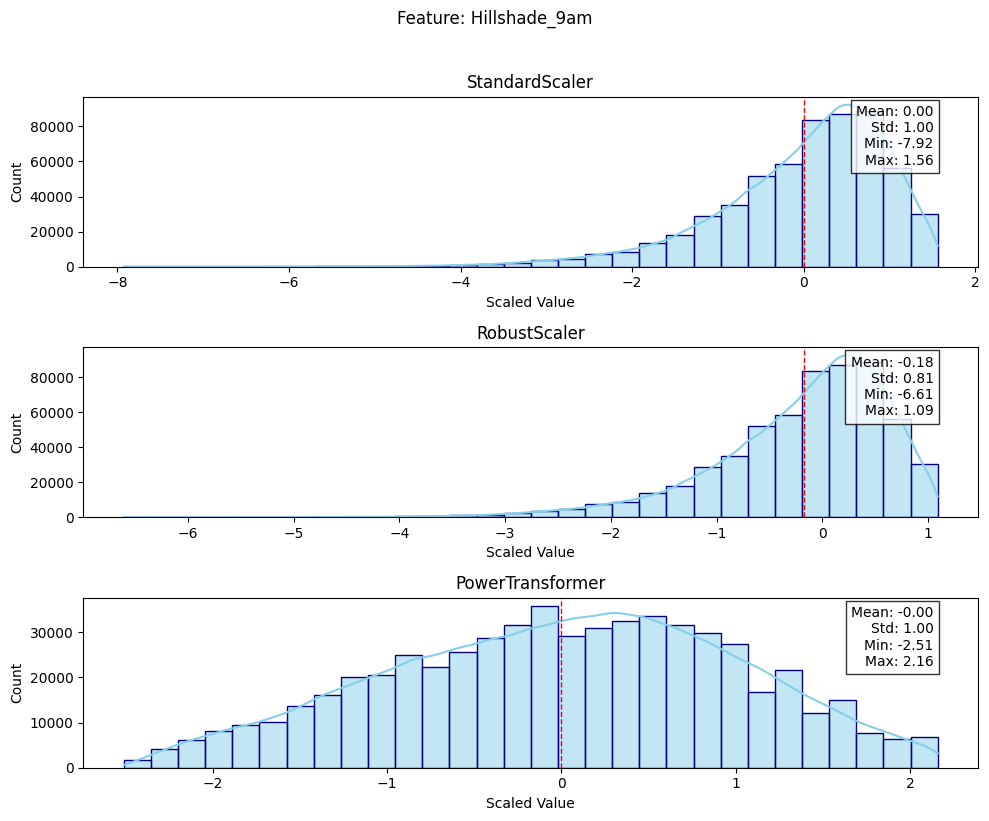

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


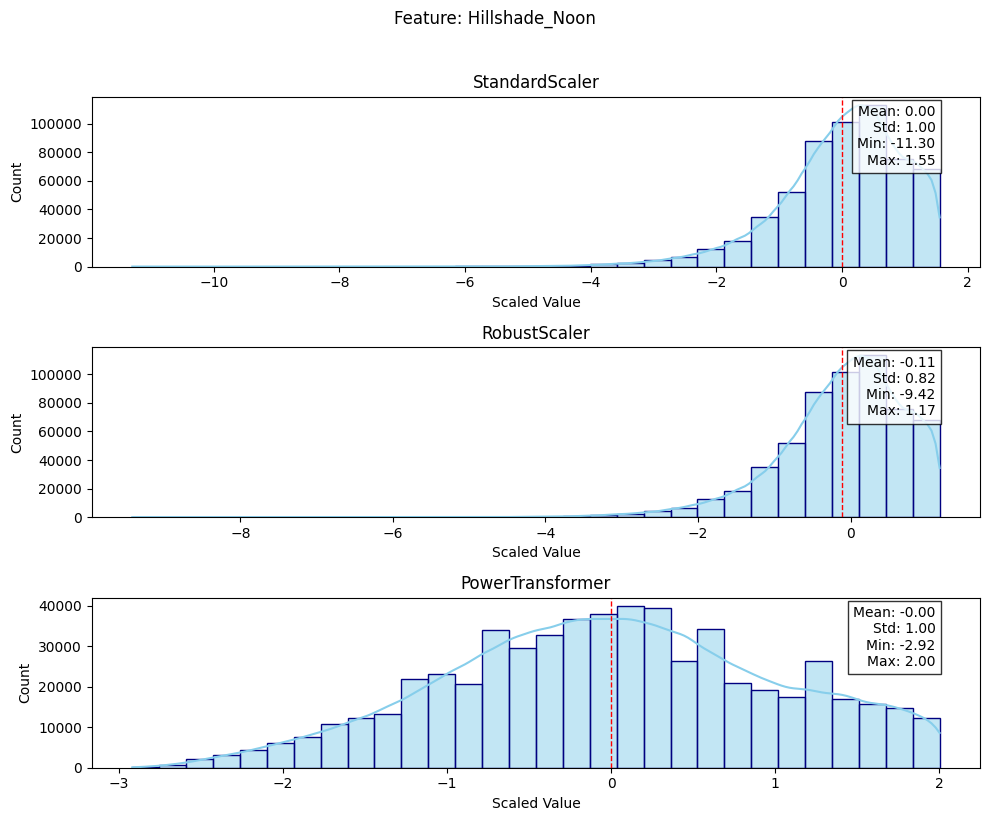

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


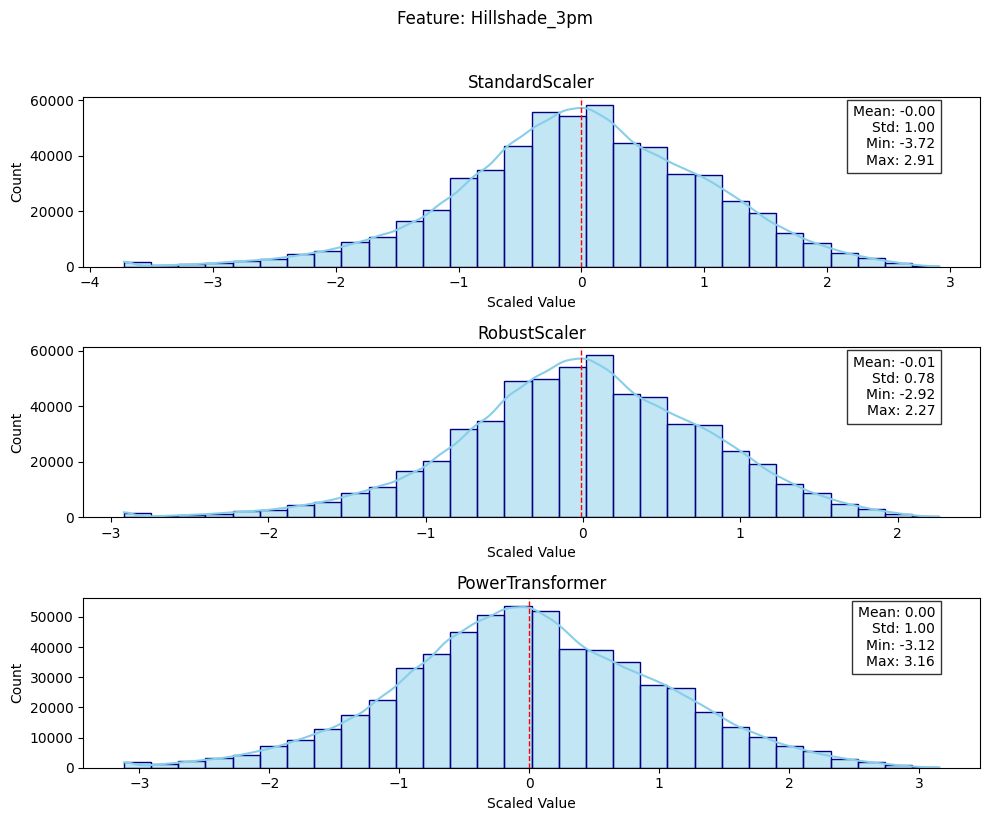

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


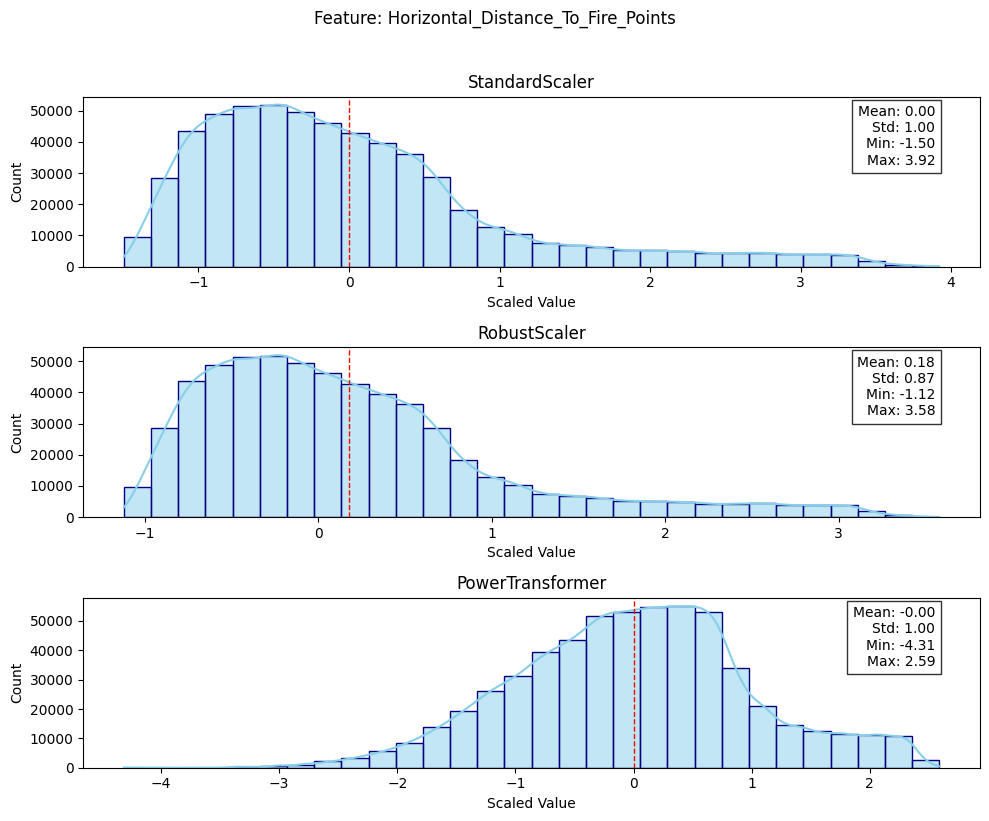

In [7]:
#First 10 Features in X
selected_features = [
    "Elevation", "Slope", "Horizontal_Distance_To_Hydrology", 
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", 
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", 
    "Horizontal_Distance_To_Fire_Points"
]
#Chosen Scalers to Compare
scalers = {
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "PowerTransformer": PowerTransformer(method='yeo-johnson')
}

# Plotting function
def plot_scaled_hist(feature, scaler_name, scaler, ax):
    try:
        scaled_data = scaler.fit_transform(X[[feature]])
        df_scaled = pd.DataFrame(scaled_data, columns=[feature])
        
        sns.histplot(data=df_scaled, x=feature, bins=30, kde=True,
                    color='skyblue', edgecolor='navy', ax=ax)
        
        mean_val = df_scaled[feature].mean()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=1)
        
        stats = (f"Mean: {mean_val:.2f}\nStd: {df_scaled[feature].std():.2f}\n"
                f"Min: {df_scaled[feature].min():.2f}\nMax: {df_scaled[feature].max():.2f}")
        
        ax.text(0.95, 0.95, stats, transform=ax.transAxes,
               ha='right', va='top', bbox=dict(facecolor='white', alpha=0.8))
        
    except Exception as e:
        ax.text(0.5, 0.5, f"Error: {str(e)}", ha='center', va='center',
               bbox=dict(facecolor='red', alpha=0.3))
    
    ax.set_title(scaler_name)
    ax.set_xlabel('Scaled Value')
    return ax

# Main loop
for feature in selected_features:
    fig, axes = plt.subplots(3, 1, figsize=(10, 8))
    fig.suptitle(f'Feature: {feature}', y=1.02)
    
    for ax, (name, scaler) in zip(axes, scalers.items()):
        plot_scaled_hist(feature, name, scaler, ax)
    
    plt.tight_layout()
    plt.show()

# **Correlation Heatmap**

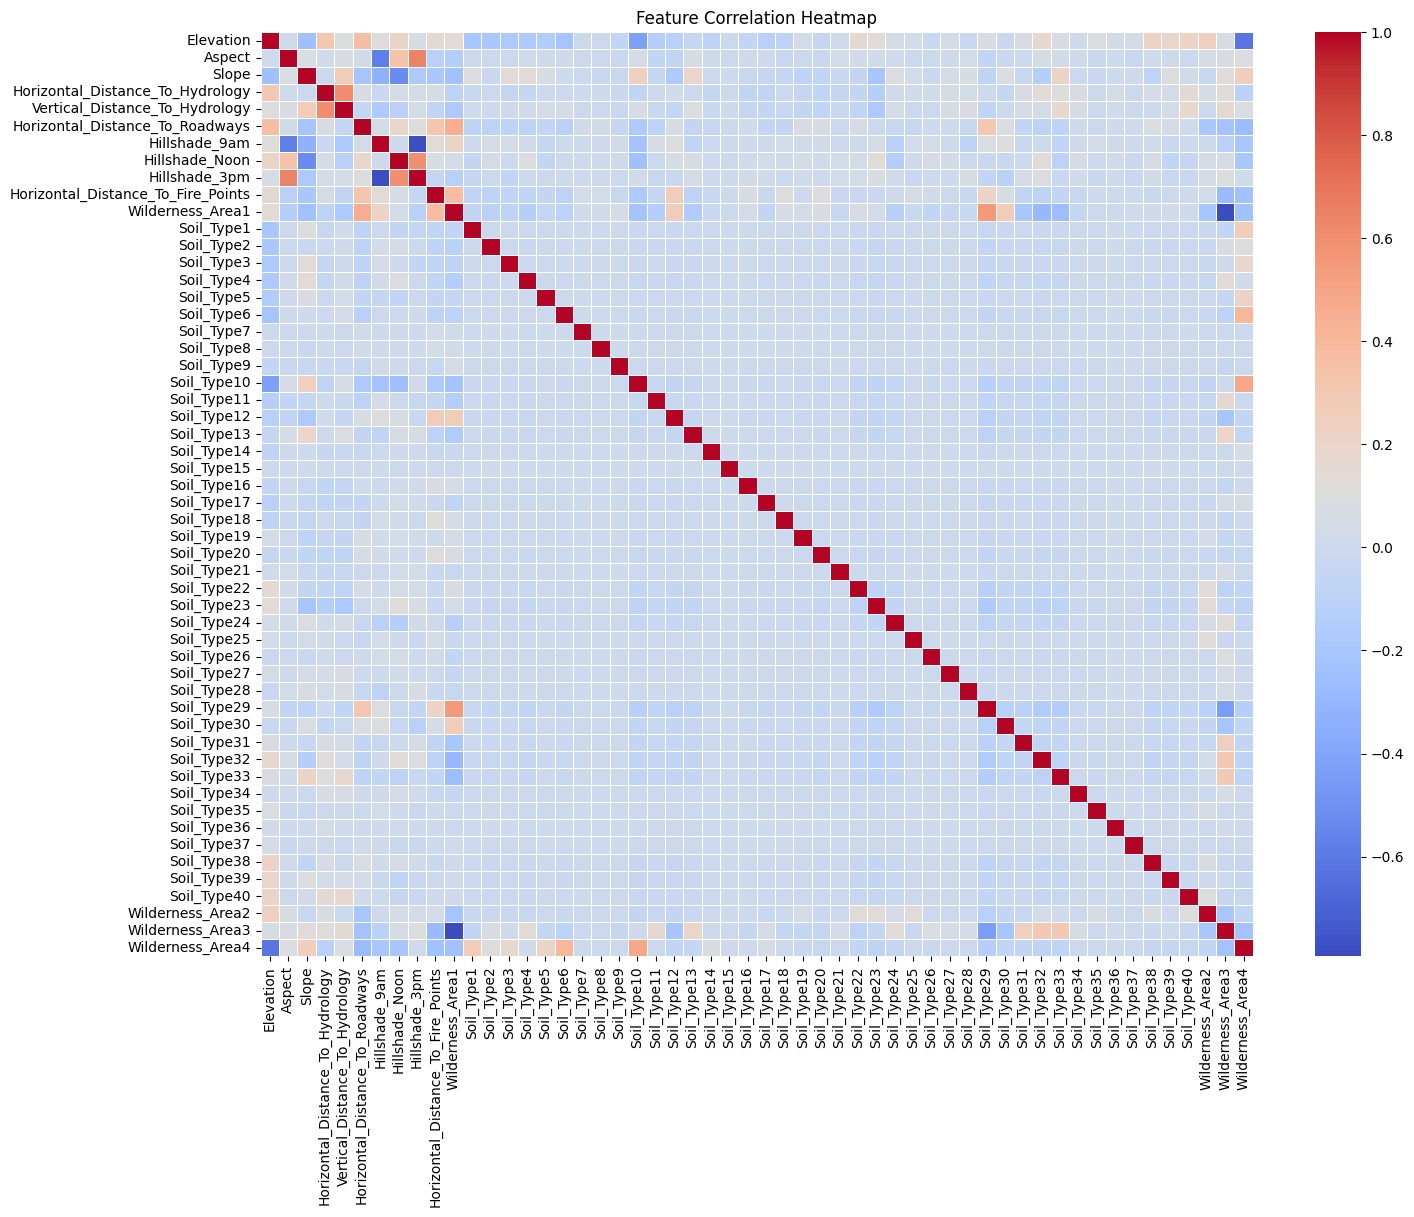

In [8]:
# Compute correlation matrix
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# **Top N +ve/-ve Correlation Values**

In [9]:
# Unstack and sort correlations
corr_pairs = corr_matrix.unstack()

# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Create a sorted tuple to treat (A, B) the same as (B, A)
corr_pairs.index = [tuple(sorted(pair)) for pair in corr_pairs.index]

# Drop duplicates
corr_pairs = corr_pairs[~corr_pairs.index.duplicated()]

# Get top N strongest correlations (positive or negative)
top_n = 30
strongest_pairs = corr_pairs.abs().sort_values(ascending=False).head(top_n).index

# Display the strongest pairs and their actual correlation values
for pair in strongest_pairs:
    print(f"{pair[0]} - {pair[1]}: {corr_matrix.loc[pair[0], pair[1]]:.2f}")

Wilderness_Area1 - Wilderness_Area3: -0.79
Hillshade_3pm - Hillshade_9am: -0.78
Aspect - Hillshade_3pm: 0.65
Elevation - Wilderness_Area4: -0.62
Horizontal_Distance_To_Hydrology - Vertical_Distance_To_Hydrology: 0.61
Hillshade_3pm - Hillshade_Noon: 0.59
Aspect - Hillshade_9am: -0.58
Soil_Type29 - Wilderness_Area1: 0.55
Hillshade_Noon - Slope: -0.53
Soil_Type10 - Wilderness_Area4: 0.49
Horizontal_Distance_To_Roadways - Wilderness_Area1: 0.45
Soil_Type29 - Wilderness_Area3: -0.44
Elevation - Soil_Type10: -0.43
Soil_Type6 - Wilderness_Area4: 0.41
Horizontal_Distance_To_Fire_Points - Wilderness_Area1: 0.38
Elevation - Horizontal_Distance_To_Roadways: 0.37
Aspect - Hillshade_Noon: 0.34
Horizontal_Distance_To_Fire_Points - Horizontal_Distance_To_Roadways: 0.33
Hillshade_9am - Slope: -0.33
Soil_Type32 - Wilderness_Area3: 0.31
Horizontal_Distance_To_Roadways - Soil_Type29: 0.31
Elevation - Horizontal_Distance_To_Hydrology: 0.31
Soil_Type33 - Wilderness_Area3: 0.29
Soil_Type32 - Wilderness_Area

# **Splitting Data and Normalization using PowerTransformer**

In [10]:
# Select numeric features excluding Aspect for transformation
features_to_transform = [
    "Elevation", "Slope", "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"
]

# Make a copy of original data
X_scaled = X.copy()

# Apply PowerTransformer to selected features only
scaler = PowerTransformer(method='yeo-johnson')
X_scaled[features_to_transform] = scaler.fit_transform(X[features_to_transform])

# Ensure Aspect &  is included as-is
X_scaled["Aspect"] = X["Aspect"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# **Random Forest Model with Hyperparameter Tuning**

In [11]:
# Random Forest Hyperparameter Tuning
rf_params = {
    'n_estimators': randint(200, 500),
    'max_depth': randint(20, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2']
}

rf_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                               param_distributions=rf_params,
                               n_iter=20,
                               cv=3,
                               scoring='accuracy',
                               random_state=42,
                               n_jobs=-1,
                               verbose=1)

rf_search.fit(X_train, y_train.values.ravel())

best_rf_model = rf_search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [12]:
# Predict with optimized Random Forest
y_pred_rf = best_rf_model.predict(X_test)

In [13]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
rf_report_df = pd.DataFrame(rf_report).transpose()

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Random Forest Report:")
print(rf_report_df.round(2))

Random Forest Accuracy: 0.9495
Random Forest Report:
              precision  recall  f1-score    support
1                  0.96    0.93      0.95   42368.00
2                  0.94    0.97      0.96   56661.00
3                  0.94    0.96      0.95    7151.00
4                  0.91    0.84      0.88     549.00
5                  0.95    0.74      0.83    1899.00
6                  0.93    0.88      0.91    3473.00
7                  0.97    0.94      0.96    4102.00
accuracy           0.95    0.95      0.95       0.95
macro avg          0.94    0.90      0.92  116203.00
weighted avg       0.95    0.95      0.95  116203.00


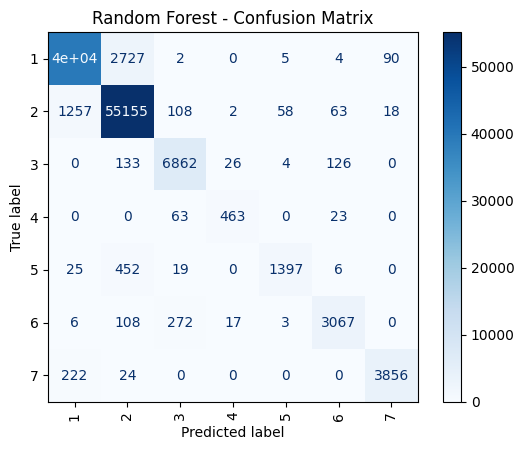

In [14]:
# Random Forest Confusion matrix
rf_cm = confusion_matrix(y_test, y_pred_rf)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=best_rf_model.classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Random Forest - Confusion Matrix")
plt.show()

# **XGBoost Model with Hyperparameter Tuning**

In [15]:
# XGBoost Hyperparameter Tuning
xgb_params = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 15),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_search = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
                                param_distributions=xgb_params,
                                n_iter=20,
                                cv=3,
                                scoring='accuracy',
                                random_state=42,
                                n_jobs=-1,
                                verbose=1)

label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train.values.ravel())
y_test_enc = label_encoder.transform(y_test.values.ravel())

xgb_search.fit(X_train, y_train_enc)

best_xgb_model = xgb_search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [16]:
# Predict with optimized XGBoost
y_pred_xgb = best_xgb_model.predict(X_test)

In [17]:
# Accuracy and report
xgb_accuracy = accuracy_score(y_test_enc, y_pred_xgb)
xgb_report_df = pd.DataFrame(classification_report(y_test_enc, y_pred_xgb, output_dict=True)).transpose()

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print("XGBoost Report:")
print(xgb_report_df.round(2))

XGBoost Accuracy: 0.9691
XGBoost Report:
              precision  recall  f1-score    support
0                  0.97    0.97      0.97   42368.00
1                  0.97    0.98      0.97   56661.00
2                  0.96    0.97      0.96    7151.00
3                  0.91    0.86      0.89     549.00
4                  0.94    0.88      0.91    1899.00
5                  0.94    0.93      0.94    3473.00
6                  0.98    0.97      0.97    4102.00
accuracy           0.97    0.97      0.97       0.97
macro avg          0.95    0.94      0.94  116203.00
weighted avg       0.97    0.97      0.97  116203.00


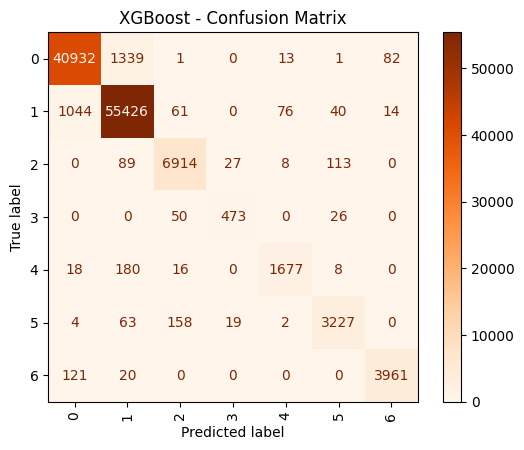

In [18]:
# XGBoost Confusion Matrix
xgb_cm = confusion_matrix(y_test_enc, y_pred_xgb)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=best_xgb_model.classes_)
disp.plot(cmap='Oranges', xticks_rotation='vertical')
plt.title("XGBoost - Confusion Matrix")
plt.show()

# **Histogram-based Gradient Boosting Classification Tree Model with Hyperparameter Tuning**

In [19]:
hgb_params = {
    'learning_rate': uniform(0.01, 0.3),
    'max_iter': randint(100, 500),
    'max_depth': randint(5, 50),
    'min_samples_leaf': randint(10, 100),
    'l2_regularization': uniform(0.0, 1.0)
}

hgb_search = RandomizedSearchCV(
    estimator=HistGradientBoostingClassifier(random_state=42),
    param_distributions=hgb_params,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

hgb_search.fit(X_train, y_train.values.ravel())

# Best model
best_hgb_model = hgb_search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [20]:
hgb_tuned_preds = best_hgb_model.predict(X_test)

In [21]:
hgb_tuned_accuracy = accuracy_score(y_test, hgb_tuned_preds)
hgb_tuned_report_df = pd.DataFrame(classification_report(y_test, hgb_tuned_preds, output_dict=True)).transpose()

print(f"HistGradientBoosting Accuracy: {hgb_tuned_accuracy:.4f}")
print("HistGradientBoosting Report:")
print(hgb_tuned_report_df.round(2))

HistGradientBoosting Accuracy: 0.9463
HistGradientBoosting Report:
              precision  recall  f1-score    support
1                  0.95    0.94      0.94   42368.00
2                  0.95    0.96      0.95   56661.00
3                  0.94    0.95      0.95    7151.00
4                  0.79    0.76      0.78     549.00
5                  0.87    0.82      0.85    1899.00
6                  0.92    0.91      0.92    3473.00
7                  0.97    0.96      0.97    4102.00
accuracy           0.95    0.95      0.95       0.95
macro avg          0.91    0.90      0.91  116203.00
weighted avg       0.95    0.95      0.95  116203.00


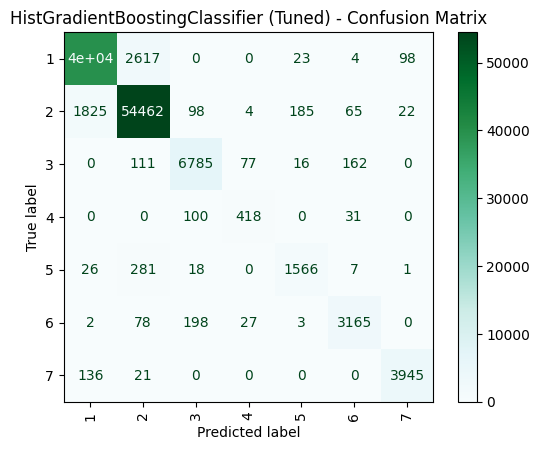

In [22]:
# Confusion Matrix
cm_hgb_tuned = confusion_matrix(y_test, hgb_tuned_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_hgb_tuned, display_labels=best_hgb_model.classes_)
disp.plot(cmap='BuGn', xticks_rotation='vertical')
plt.title("HistGradientBoostingClassifier (Tuned) - Confusion Matrix")
plt.show()

In [23]:
# Model Performance Comparison
print("Model Performance Comparison:")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"HistGradientBoosting Accuracy: {hgb_tuned_accuracy:.4f}")

# Determine best model
if rf_accuracy >= xgb_accuracy and rf_accuracy >= hgb_tuned_accuracy:
    best_model = best_rf_model
    best_model_name = "Random Forest"
elif xgb_accuracy >= rf_accuracy and xgb_accuracy >= hgb_tuned_accuracy:
    best_model = best_xgb_model
    best_model_name = "XGBoost"
else:
    best_model = best_hgb_model
    best_model_name = "HistGradientBoosting"

Model Performance Comparison:
Random Forest Accuracy: 0.9495
XGBoost Accuracy: 0.9691
HistGradientBoosting Accuracy: 0.9463


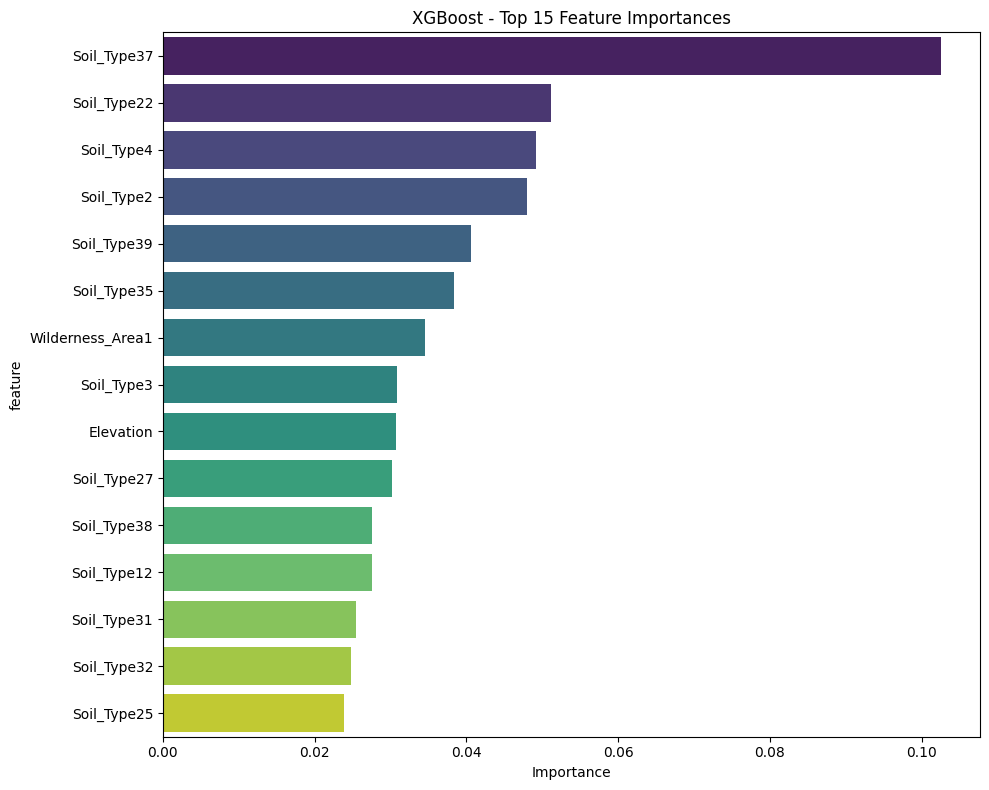


Top 10 Most Important Features (XGBoost):
             feature  importance
47       Soil_Type37      0.1026
32       Soil_Type22      0.0512
14        Soil_Type4      0.0492
12        Soil_Type2      0.0480
49       Soil_Type39      0.0406
45       Soil_Type35      0.0384
10  Wilderness_Area1      0.0345
13        Soil_Type3      0.0308
0          Elevation      0.0307
37       Soil_Type27      0.0302


In [24]:
# Feature Importance (only if model has attribute)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance.head(15), x='importance', y='feature', palette='viridis')
    plt.title(f'{best_model_name} - Top 15 Feature Importances')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

    print(f"\nTop 10 Most Important Features ({best_model_name}):")
    print(feature_importance.head(10).round(4))
else:
    print(f"{best_model_name} does not support feature_importances_.")